# Montecarlo (Ottimizzazione Portafoglio)
[1 Portfolio Optimization Using Monte Carlo Simulation](https://blog.quantinsti.com/portfolio-optimization-maximum-return-risk-ratio-python/)

In [191]:
#Import relevant libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [192]:
#Fetch data from yahoo and save under DataFrame named 'data'
stock = ['BAC', 'GS', 'JPM', 'MS']
data = web.DataReader(stock,data_source="yahoo",start='12/01/2017',end='12/31/2017')['Adj Close']

In [193]:
#Arrange the data in ascending order
data=data.iloc[::-1]
print (data.round(2))

Symbols       BAC      GS    JPM     MS
Date                                   
2017-12-29  27.35  238.68  96.01  47.63
2017-12-28  27.61  240.32  96.77  47.79
2017-12-27  27.55  239.80  96.26  47.72
2017-12-26  27.59  241.46  96.08  47.63
2017-12-22  27.68  242.63  96.46  47.85
2017-12-21  27.63  244.54  96.80  48.00
2017-12-20  27.31  239.08  95.29  47.66
2017-12-19  27.29  240.30  95.62  48.04
2017-12-18  27.31  243.61  96.02  48.33
2017-12-15  26.91  240.94  95.29  48.20
2017-12-14  26.62  239.36  93.96  47.78
2017-12-13  26.72  239.43  94.72  48.27
2017-12-12  27.17  241.42  95.92  48.88
2017-12-11  26.81  234.35  94.82  47.90
2017-12-08  26.92  234.55  95.10  48.01
2017-12-07  26.66  232.88  93.92  47.52
2017-12-06  26.54  230.43  94.20  46.92
2017-12-05  26.80  232.66  94.91  47.21
2017-12-04  26.92  234.83  96.01  47.82
2017-12-01  26.03  233.24  94.08  47.15


In [194]:
#Compute stock returns and print the returns in percentage format
stock_ret = data.pct_change()
print (stock_ret.round(4)*100)

Symbols      BAC    GS   JPM    MS
Date                              
2017-12-29   NaN   NaN   NaN   NaN
2017-12-28  0.95  0.68  0.79  0.34
2017-12-27 -0.23 -0.21 -0.53 -0.15
2017-12-26  0.17  0.69 -0.19 -0.19
2017-12-22  0.34  0.49  0.40  0.48
2017-12-21 -0.20  0.79  0.35  0.30
2017-12-20 -1.14 -2.23 -1.57 -0.70
2017-12-19 -0.10  0.51  0.35  0.80
2017-12-18  0.10  1.38  0.42  0.59
2017-12-15 -1.49 -1.10 -0.77 -0.26
2017-12-14 -1.07 -0.66 -1.39 -0.87
2017-12-13  0.38  0.03  0.81  1.03
2017-12-12  1.66  0.83  1.27  1.26
2017-12-11 -1.30 -2.93 -1.15 -2.01
2017-12-08  0.38  0.09  0.29  0.23
2017-12-07 -0.93 -0.72 -1.24 -1.02
2017-12-06 -0.49 -1.05  0.30 -1.26
2017-12-05  1.01  0.97  0.75  0.62
2017-12-04  0.45  0.93  1.16  1.29
2017-12-01 -3.30 -0.68 -2.02 -1.39


In [195]:
#Calculate mean returns and covariances of all four the stocks
mean_returns = stock_ret.mean()
cov_matrix = stock_ret.cov()
print (mean_returns)
print (cov_matrix)

Symbols
BAC   -0.002531
GS    -0.001151
JPM   -0.001022
MS    -0.000482
dtype: float64
Symbols       BAC        GS       JPM        MS
Symbols                                        
BAC      0.000125  0.000085  0.000099  0.000082
GS       0.000085  0.000131  0.000084  0.000088
JPM      0.000099  0.000084  0.000098  0.000078
MS       0.000082  0.000088  0.000078  0.000089


In [196]:
#Set the number of iterations to 10000 and define an array to hold the simulation results; initially set to all zeros
num_iterations = 10000
simulation_res = np.zeros((4+len(stock)-1,num_iterations))

In [197]:
for i in range(num_iterations):
    #Select random weights and normalize to set the sum to 1
    weights = np.array(np.random.random(4))
    weights /= np.sum(weights)
#Calculate the return and standard deviation for every step
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
#Store all the results in a defined array
    simulation_res[0,i] = portfolio_return
    simulation_res[1,i] = portfolio_std_dev
#Calculate Sharpe ratio and store it in the array
    simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
#Save the weights in the array
    for j in range(len(weights)):
            simulation_res[j+3,i] = weights[j]


In [198]:
sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3]])
print (sim_frame.head())
print (sim_frame.tail())

        ret     stdev    sharpe       BAC        GS       JPM        MS
0 -0.001220  0.009768 -0.124886  0.202053  0.412008  0.089531  0.296408
1 -0.001669  0.009969 -0.167437  0.427938  0.172145  0.361515  0.038403
2 -0.001348  0.009590 -0.140535  0.310820  0.178653  0.202510  0.308017
3 -0.001760  0.010032 -0.175448  0.483142  0.257393  0.214684  0.044781
4 -0.001142  0.009588 -0.119056  0.113888  0.269408  0.455641  0.161063
           ret     stdev    sharpe       BAC        GS       JPM        MS
9995 -0.001121  0.009658 -0.116029  0.106244  0.367565  0.324344  0.201847
9996 -0.001823  0.010209 -0.178566  0.535968  0.051609  0.385558  0.026865
9997 -0.001764  0.009989 -0.176600  0.550803  0.102118  0.157469  0.189610
9998 -0.001153  0.009604 -0.120092  0.190242  0.319753  0.125452  0.364553
9999 -0.001732  0.009977 -0.173599  0.495115  0.277952  0.091633  0.135300


In [199]:
#Spot the position of the portfolio with highest Sharpe Ratio
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]

In [200]:
#Spot the position of the portfolio with minimum Standard Deviation
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]
print ("The portfolio for max Sharpe Ratio:\n", max_sharpe)
print ("The portfolio for min risk:\n", min_std)

The portfolio for max Sharpe Ratio:
 ret      -0.000622
stdev     0.009369
sharpe   -0.066411
BAC       0.039061
GS        0.045881
JPM       0.055125
MS        0.859933
Name: 7746, dtype: float64
The portfolio for min risk:
 ret      -0.000701
stdev     0.009240
sharpe   -0.075916
BAC       0.000836
GS        0.020223
JPM       0.378693
MS        0.600248
Name: 7040, dtype: float64


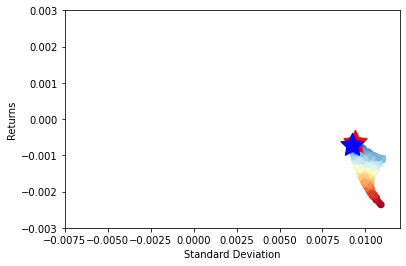

In [201]:
#Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.ylim(-0.003,.003)
plt.xlim(-0.0075,0.012)
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)
#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='b',s=600)
plt.show()